In [1]:
#mount
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import sys
root_dir="/content/gdrive/My Drive/Projects/flower"
sys.path.append(root_dir)

%cd "/content/gdrive/My Drive/Projects/flower/wm"

/content/gdrive/My Drive/Projects/flower/wm


In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import importlib
import tradestats
import pandas as pd
from datetime import datetime
import sys

In [5]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [6]:
importlib.reload(tradestats)
from tradestats import *

In [7]:
importlib.reload(tradestats)
from tradestats import *
from tradestats import rose
prices = loaddata_1W('mbk_w.csv')

In [87]:
importlib.reload(tradestats)
from tradestats import *
from tradestats import rose

history = 10
ignore_max = 11
entry_max = ignore_max
#filenames = ['wig_w.csv','wig20_w.csv','mbk_w.csv','alr_w.csv','pko_w.csv','peo_w.csv','pkn_w.csv','san_w.csv','pzu_w.csv','pge_w.csv','pco_w.csv','opl_w.csv','lpp_w.csv','kru_w.csv','kgh_w.csv','jsw_w.csv','kty_w.csv','dnp_w.csv','cps_w.csv','cdr_w.csv','acp_w.csv','ale_w.csv']
#filenames = ['wig_d.csv','wig20_d.csv','mbk_d.csv','alr_d.csv','pko_d.csv','peo_d.csv','pkn_d.csv','san_d.csv','pzu_d.csv','pge_d.csv','pco_d.csv','opl_d.csv','lpp_d.csv','kru_d.csv','kgh_d.csv','jsw_d.csv','kty_d.csv','dnp_d.csv','cps_d.csv','cdr_d.csv','acp_d.csv','ale_d.csv']
#filenames = ['spx_w.csv','wig20short_w.csv','wig20lev_w.csv','tbsp_w.csv','swig80tr_w.csv','wigtechtr_w.csv','ndq_w.csv','mwig40tr_w.csv','dax_w.csv','wig20tr_w.csv']
#filenames = ['spx_d.csv','wig20short_d.csv','wig20lev_d.csv','tbsp_d.csv','swig80tr_d.csv','wigtechtr_d.csv','ndq_d.csv','mwig40tr_d.csv','dax_d.csv','wig20tr_d.csv']
#filenames = ['mbk_w.csv']
filenames = ['peo_w.csv']
progress = 0
progress_max = ((ignore_max)/2)*(ignore_max-1)*len(filenames)
stats = pd.DataFrame()

for filename in filenames:
  print('')
  print(filename)
  if '_d.'in filename:
    prices = loaddata_1D(filename)
  elif '_w.'in filename:
    prices = loaddata_1W(filename)
  else:
    print('file timeframe not supported')
    continue
#  for ignore in range(1,ignore_max):
#    for entry in range(ignore,entry_max):
  for ignore in range(3,4):
    for entry in range(4,5):
      periods = [2]
      dictList = []
      colFeat = []
      keyList = []
      roseDict   = rose(prices, periods,history,ignore,entry)
      dictList.append(roseDict.df); colFeat.append('rose'); keyList.append(periods)
      masterFrame = pd.DataFrame(index=prices.index)
      masterFrame[['year','date','close']] = prices[['year','date','close']]

      for i in range(0,len(dictList)):#iteracja po funkcjach
        for j in keyList[i]: #iteracja po okresach
          for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
              colID = colFeat[i] + str(j) + k
              masterFrame[colID] = dictList[i][j][k]
      masterFrame = masterFrame.dropna()
      #sum = masterFrame['rose2profit'].agg('sum')
      masterFrame.insert(loc=2, column='rose2profit0', value=masterFrame['rose2profit'])
      masterFrame.insert(loc=2, column='rose2profit1', value=1+masterFrame['rose2profit'])
      sum = np.prod(masterFrame['rose2profit1'])
      #sum1990 = masterFrame.loc[(masterFrame.year>=1990) & (masterFrame.year<2000),'rose2profit'].agg('sum')
      sum1990 = np.prod(masterFrame.loc[(masterFrame.year>=1990) & (masterFrame.year<2000),'rose2profit1'])
      #sum2000 = masterFrame.loc[(masterFrame.year>=2000) & (masterFrame.year<2010),'rose2profit'].agg('sum')
      sum2000 = np.prod(masterFrame.loc[(masterFrame.year>=2000) & (masterFrame.year<2010),'rose2profit1'])
      #sum2010 = masterFrame.loc[(masterFrame.year>=2010) & (masterFrame.year<2020),'rose2profit'].agg('sum')
      sum2010 = np.prod(masterFrame.loc[(masterFrame.year>=2010) & (masterFrame.year<2020),'rose2profit1'])
      #sum2020 = masterFrame.loc[(masterFrame.year>=2020) & (masterFrame.year<2030),'rose2profit'].agg('sum')
      sum2020 = np.prod(masterFrame.loc[(masterFrame.year>=2020) & (masterFrame.year<2030),'rose2profit1'])
      #sumXX = masterFrame.loc[(masterFrame.year>=2000) & (masterFrame.year<2030),'rose2profit'].agg('sum')
      sumXX = np.prod(masterFrame.loc[(masterFrame.year>=2000) & (masterFrame.year<2030),'rose2profit1'])

      #xx = masterFrame.groupby('year').rose2profit.agg('sum')
      xx = masterFrame.groupby('year')['rose2profit1'].apply(np.prod).sort_index(ascending=False)
      df = xx.to_frame().T
      df.insert(loc=0, column='10y2024',  value=[0])
      df.insert(loc=0, column='10y2023',  value=[0])
      df.insert(loc=0, column='10y2022',  value=[0])
      df.insert(loc=0, column='10y2021',  value=[0])
      df.insert(loc=0, column='10y2020',  value=[0])
      df.insert(loc=0, column='10y2019',  value=[0])
      df.insert(loc=0, column='10y2018',  value=[0])
      df.insert(loc=0, column='10y2017',  value=[0])
      df.insert(loc=0, column='10y2016',  value=[0])
      df.insert(loc=0, column='10y2015',  value=[0])
      df.insert(loc=0, column='10y2014',  value=[0])
      df.insert(loc=0, column='10y2013',  value=[0])
      df.insert(loc=0, column='10y2012',  value=[0])
      df.insert(loc=0, column='10y2011',  value=[0])
      df.insert(loc=0, column='10y2010',  value=[0])
      df.insert(loc=0, column='10y2009',  value=[0])
      if 2015 in df.columns: df['10y2024'] = df[2024]*df[2023]*df[2022]*df[2021]*df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]
      if 2014 in df.columns: df['10y2023'] = df[2023]*df[2022]*df[2021]*df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]
      if 2013 in df.columns: df['10y2022'] = df[2022]*df[2021]*df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]
      if 2012 in df.columns: df['10y2021'] = df[2021]*df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]
      if 2011 in df.columns: df['10y2020'] = df[2020]*df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]
      if 2010 in df.columns: df['10y2019'] = df[2019]*df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]
      if 2009 in df.columns: df['10y2018'] = df[2018]*df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]
      if 2008 in df.columns: df['10y2017'] = df[2017]*df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]
      if 2007 in df.columns: df['10y2016'] = df[2016]*df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]
      if 2006 in df.columns: df['10y2015'] = df[2015]*df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]
      if 2005 in df.columns: df['10y2014'] = df[2014]*df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]
      if 2004 in df.columns: df['10y2013'] = df[2013]*df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]
      if 2003 in df.columns: df['10y2012'] = df[2012]*df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]*df[2003]
      if 2002 in df.columns: df['10y2011'] = df[2011]*df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]*df[2003]*df[2002]
      if 2001 in df.columns: df['10y2010'] = df[2010]*df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]*df[2003]*df[2002]*df[2001]
      if 2000 in df.columns: df['10y2009'] = df[2009]*df[2008]*df[2007]*df[2006]*df[2005]*df[2004]*df[2003]*df[2002]*df[2001]*df[2000]

      df.insert(loc=0, column='sum2020',  value=[sum2020])
      df.insert(loc=0, column='sum2010',  value=[sum2010])
      df.insert(loc=0, column='sum2000',  value=[sum2000])
      df.insert(loc=0, column='sum1990',  value=[sum1990])
      df.insert(loc=0, column='sumXX',    value=[sumXX])
      df.insert(loc=0, column='sum',      value=[sum])
      df.insert(loc=0, column='entry',    value=[entry])
      df.insert(loc=0, column='ignore',   value=[ignore])
      df.insert(loc=0, column='file',     value=[filename])
      df.reset_index(inplace = True, drop = True)
      if len(stats.index) == 0:
        stats = df
      else:
        stats = pd.concat([stats, df], ignore_index=True)
      progress +=1
      sys.stdout.write("\r%d%%" % round(progress/progress_max*100,0))
      sys.stdout.flush()




peo_w.csv
2%

In [9]:
 stats.round(2)

year,file,ignore,entry,sum,sumXX,sum1990,sum2000,sum2010,sum2020,10y2009,...,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998
0,peo_w.csv,3,4,3.88,3.94,0.98,2.19,0.4,4.53,2.19,...,0.82,1.04,1.29,1.1,1.12,1.09,1.01,1.44,0.97,1.02


In [ ]:
stats.round(2).to_csv(sep=';',path_or_buf='../Data/stats_etf_d.csv',date_format="%Y-%m-%d",index = False,na_rep='', decimal=',')

In [ ]:
 masterFrame#.tail(100)

In [85]:
# @title date vs close

from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']
  ys1= series['rose2open_trade']
  ys2= series['rose2close_trade']
  ys3= series['rose2rosehigh']
  ys4= series['rose2roselow']

  plt.plot(xs, ys, label=series_name, color=palette[1])
  plt.bar(xs, ys3, label=series_name, color='blue', width = 4)
  plt.bar(xs, ys4, label=series_name, color='yellow', width = 4)
  plt.bar(xs, ys1, label=series_name, color='green', width = 2)
  bc = plt.bar(xs, ys2, label=series_name, color='red', width = 2)
  plt.ylim(bottom=ys.min()*0.9)
  return bc

def _plot_prices(from_year,until_year,name=filename):
  fig, ax = plt.subplots(figsize=(20, 4.2), layout='constrained')
  masterFrame1 = masterFrame.loc[(masterFrame.year>=from_year) & (masterFrame.year<until_year)]
  df_sorted = masterFrame1.sort_values('date', ascending=True)
  bc = _plot_series(df_sorted, '')
  ax.bar_label(bc, labels = masterFrame1['rose2profit'].round(2),label_type='edge', padding=12)
  sns.despine(fig=fig, ax=ax)
  plt.xlabel('date')
  _ = plt.ylabel('close')
  plt.title(name)


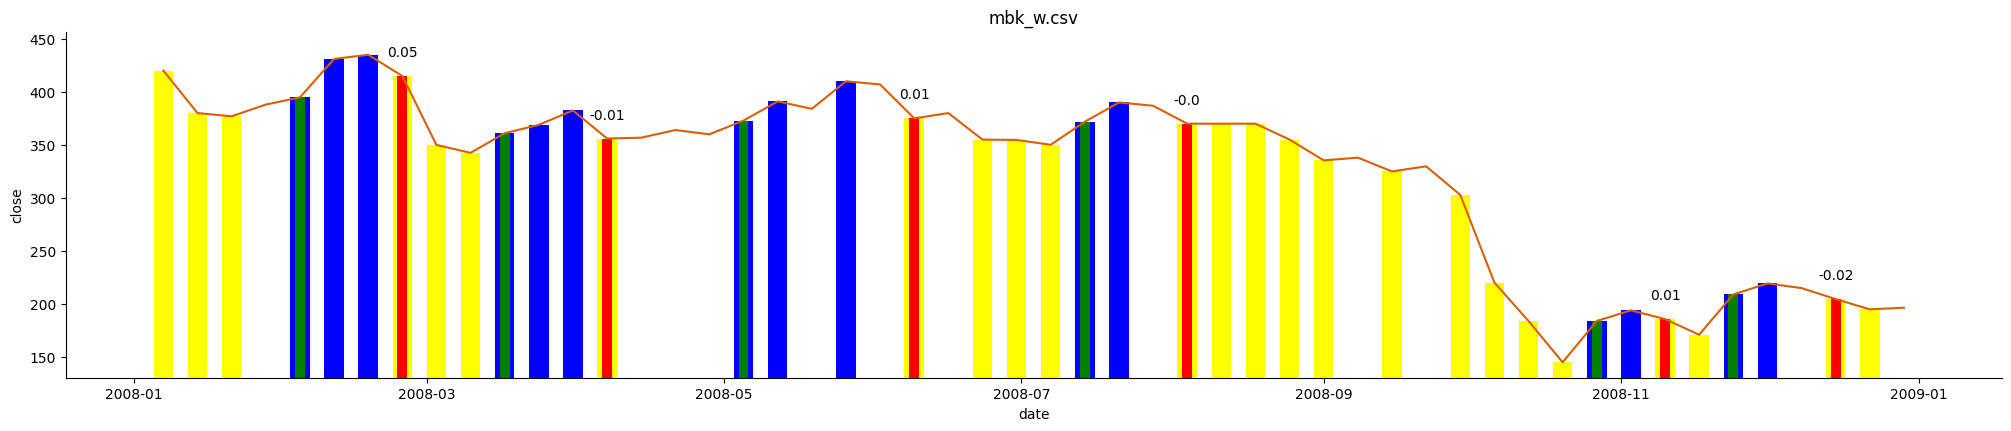

In [86]:
_plot_prices(2008,2009,filename)

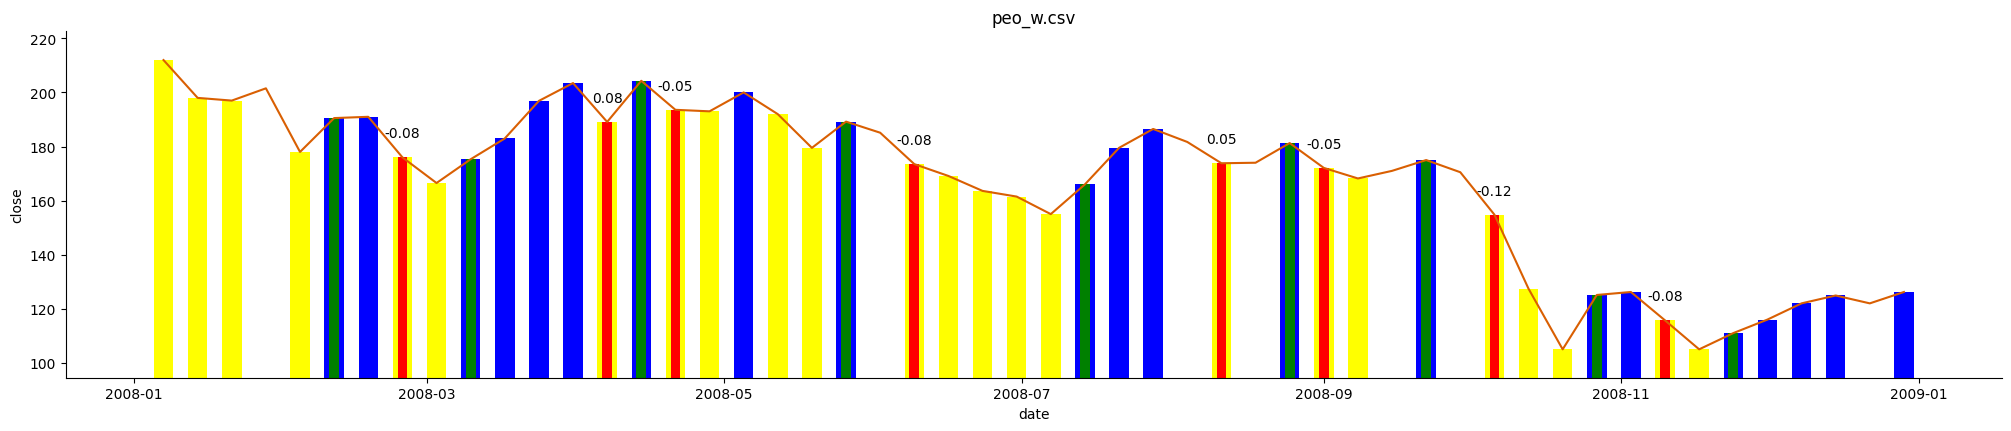

In [90]:
_plot_prices(2008,2009,filename)

In [ ]:
masterFrame.groupby('year')['rose2profit1'].apply(np.prod).sort_index(ascending=False)

year
2024    1.000000
2023    1.000000
2022    1.000000
2021    1.000000
2020    1.000000
2019    1.000000
2018    1.000000
2017    1.000000
2016    1.000000
2015    1.000000
2014    1.000000
2013    1.000000
2012    1.000000
2011    1.000000
2010    1.000000
2009    1.000000
2008    0.682952
2007    1.000000
2006    1.000000
2005    1.000000
2004    1.000000
Name: rose2profit1, dtype: float64

In [ ]:
# prices.dropna(inplace=True)
masterFrame = pd.DataFrame(index=prices.index)
#masterFrame[['id','year','month','day','date','weekday','open','high','low','close','volume']] = prices[['id','year','month','day','date','weekday','open','high','low','close','volume']]
masterFrame[['year','date','close']] = prices[['year','date','close']]

In [ ]:
for i in range(0,len(dictList)):#iteracja po funkcjach
    for j in keyList[i]: #iteracja po okresach
        for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
            colID = colFeat[i] + str(j) + k
            masterFrame[colID] = dictList[i][j][k]

In [ ]:
masterFrame = masterFrame.dropna()

In [ ]:
masterFrame#.tail(100)

,year,date,close,rose2rose,rose2uptick_date,rose2uptick_close,rose2uptick_diff,rose2downtick_date,rose2downtick_close,rose2downtick_diff,rose2entry,rose2open_trade_date,rose2open_trade_close,rose2profit
0,1992,1992-10-05,3.919933,1,1900-01-01,0.000000,0.000000,1900-01-01,0.000000,0.000000,0,1900-01-01,0.0,0.0
1,1992,1992-10-12,3.600065,-2,1900-01-01,0.000000,0.000000,1900-01-01,0.000000,0.000000,0,1900-01-01,0.0,0.0
2,1992,1992-10-19,4.339995,2,1900-01-01,0.000000,0.000000,1992-10-12,3.600065,0.205532,1,1900-01-01,0.0,0.0
3,1992,1992-10-26,4.220030,-2,1992-10-19,4.339995,-0.027642,1992-10-12,3.600065,0.172209,0,1900-01-01,0.0,0.0
4,1992,1992-11-02,4.200015,-2,1992-10-19,4.339995,-0.032254,1992-10-12,3.600065,0.166650,0,1900-01-01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,2024,2024-01-01,525.600000,-2,2023-12-18,548.000000,-0.040876,1900-01-01,0.000000,0.000000,0,1900-01-01,0.0,0.0
1631,2024,2024-01-08,526.600000,0,2023-12-18,548.000000,-0.039051,2024-01-01,525.600000,0.001903,0,1900-01-01,0.0,0.0
1632,2024,2024-01-15,499.300000,-2,2023-12-18,548.000000,-0.088869,1900-01-01,0.000000,0.000000,-1,1900-01-01,0.0,0.0
1633,2024,2024-01-22,506.800000,0,2023-12-18,548.000000,-0.075182,2024-01-15,499.300000,0.015021,0,1900-01-01,0.0,0.0


In [ ]:
xx = masterFrame.groupby('year').rose2profit.agg('sum')

In [ ]:
xx

year
1992   -0.133626
1993    2.405860
1994    0.897425
1995    0.252366
1996    0.072739
1997   -0.247984
1998    0.776744
1999    0.204119
2000   -0.098078
2001   -0.248301
2002   -0.153606
2003    0.310914
2004   -0.016397
2005    0.163426
2006    0.092362
2007    0.965556
2008   -0.398703
2009    0.970405
2010   -0.066743
2011   -0.153570
2012    0.069098
2013    0.419331
2014   -0.306175
2015   -0.177605
2016   -0.097134
2017    0.130127
2018   -0.138907
2019    0.002819
2020   -0.333350
2021    1.406444
2022   -0.010812
2023    0.581544
2024    0.000000
Name: rose2profit, dtype: float64

In [ ]:
df = xx.to_frame().T

In [ ]:
df

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
rose2profit,-0.133626,2.40586,0.897425,0.252366,0.072739,-0.247984,0.776744,0.204119,-0.098078,-0.248301,...,-0.177605,-0.097134,0.130127,-0.138907,0.002819,-0.33335,1.406444,-0.010812,0.581544,0.0


In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df

year,file,ignore,entry,sum,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,mbk_w.csv,10,10,0.228832,0.0,1.892872,0.934047,-0.192952,0.944369,-0.247984,...,-0.384633,-0.073952,0.0,-0.00121,-0.088292,-0.298343,0.514436,-0.366781,0.273406,0.106114


In [ ]:
df2 = df.copy()

In [ ]:
df_row_merged = pd.concat([df, df2], ignore_index=True)

In [ ]:
df_row_merged

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2018,2019,2020,2021,2022,2023,2024,ignore,entry,file
0,-0.133626,2.40586,0.897425,0.252366,0.072739,-0.247984,0.776744,0.204119,-0.098078,-0.248301,...,-0.138907,0.002819,-0.33335,1.406444,-0.010812,0.581544,0.0,1,1,mbk_w.csv
1,-0.133626,2.40586,0.897425,0.252366,0.072739,-0.247984,0.776744,0.204119,-0.098078,-0.248301,...,-0.138907,0.002819,-0.33335,1.406444,-0.010812,0.581544,0.0,1,1,mbk_w.csv


In [ ]:
masterFrame.loc[masterFrame.year>=2022,'rose2profit'].agg('sum')

0.01273927468477426

In [ ]:
masterFrame['rose2profit'].agg('sum')

5.743466877721712

In [ ]:
masterFrame.to_csv(sep=';',path_or_buf='../Data/stats.csv',date_format="%Y-%m-%d",index = False,na_rep='')

rose2profit   -0.133626
Name: 1992, dtype: float64

In [ ]:
importlib.reload(tradestats)
from tradestats import *
starttime = datetime.now()
# alltrades = preparetrades_brut_tsl(masterFrame,[1],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],2016,2017)
alltrades = preparetrades_brut_tp(masterFrame,[1],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],2016,2017)
endtime = datetime.now()
print(str(endtime - starttime))

In [ ]:
importlib.reload(tradestats)
from tradestats import *
trades = cleartrades_brut(alltrades.copy(),True)
# trades,alltrades = preparetrades(masterFrame,[-1,1],[5],[13],[0.002],True)

In [ ]:
#____________________________________________________________________________________________________________________
#
#
alltrades.head(2)

In [ ]:
importlib.reload(tradestats)
from tradestats import *
stats1 = runstats_brut_v3(alltrades)